In [7]:
import pandas as pd

import pandas as pd

df = pd.read_csv('/content/covid_19_clean_complete.csv')

# Display first 5 rows
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,22-01-2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,22-01-2020,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,22-01-2020,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,22-01-2020,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,22-01-2020,0,0,0,0,Africa


In [8]:
# Check the shape of the dataset
print("Shape of dataset:", df.shape)

# Check data types and missing values
df.info()

# Summary statistics
df.describe()

Shape of dataset: (49068, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [9]:
df.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [10]:
# Group by Country and get total confirmed, deaths, recovered
country_data = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().sort_values(by='Confirmed', ascending=False).head(10)
country_data

,Confirmed,Deaths,Recovered
Country/Region,,,
US,224345948,11011411,56353416
Brazil,89524967,3938034,54492873
Russia,45408411,619385,25120448
India,40883464,1111831,23783720
Spain,27404045,3033030,15093583
United Kingdom,26748587,3997775,126217
Italy,26745145,3707717,15673910
France,21210926,3048524,7182115
Germany,21059152,871322,17107839


In [11]:
!pip install matplotlib seaborn

/tmp/ipython-input-12-1083277975.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_data.index, y=country_data['Confirmed'], palette='Reds_r')


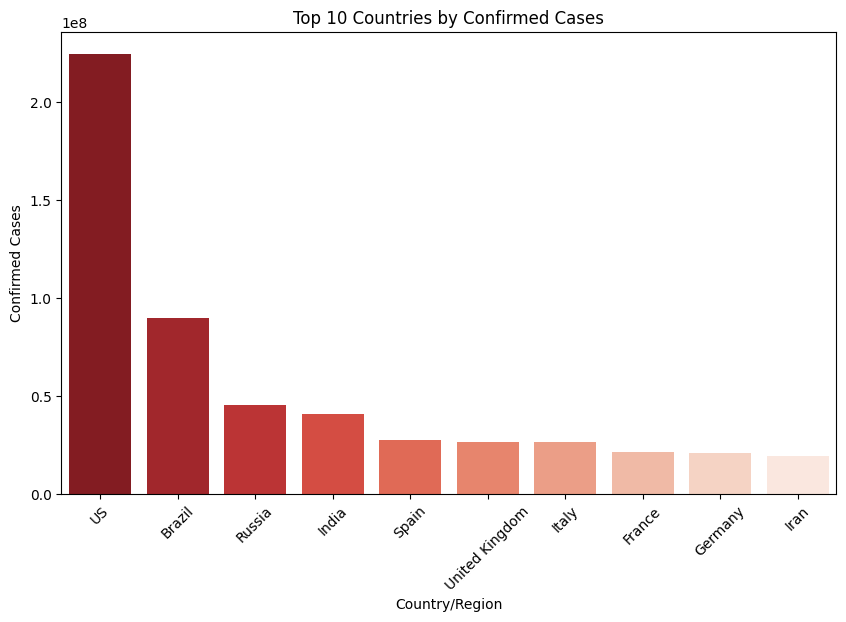

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 countries - Confirmed Cases
plt.figure(figsize=(10,6))
sns.barplot(x=country_data.index, y=country_data['Confirmed'], palette='Reds_r')
plt.title('Top 10 Countries by Confirmed Cases')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-13-3016002025.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


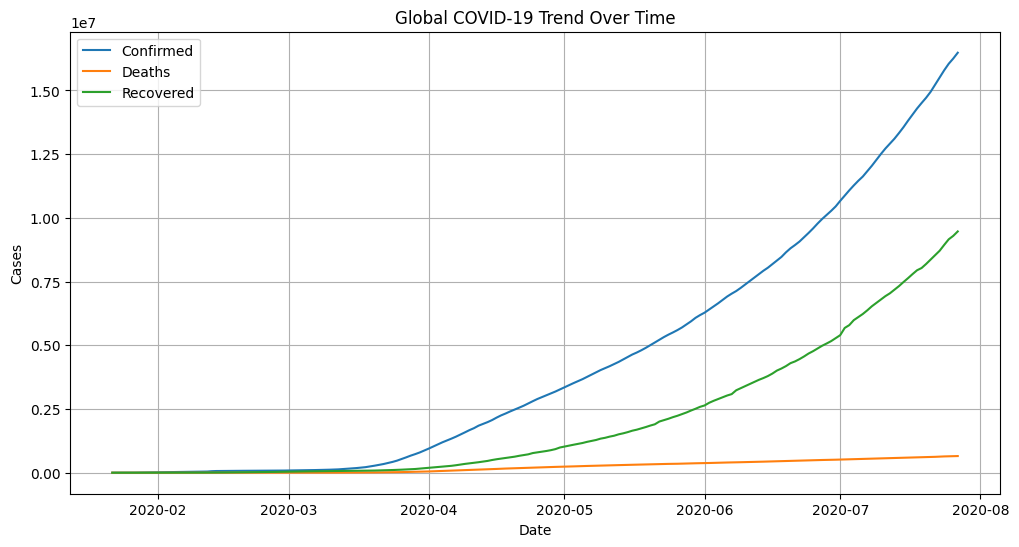

In [13]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by Date and get global totals
datewise = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Plot
plt.figure(figsize=(12,6))
plt.plot(datewise.index, datewise['Confirmed'], label='Confirmed')
plt.plot(datewise.index, datewise['Deaths'], label='Deaths')
plt.plot(datewise.index, datewise['Recovered'], label='Recovered')
plt.title('Global COVID-19 Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.show()

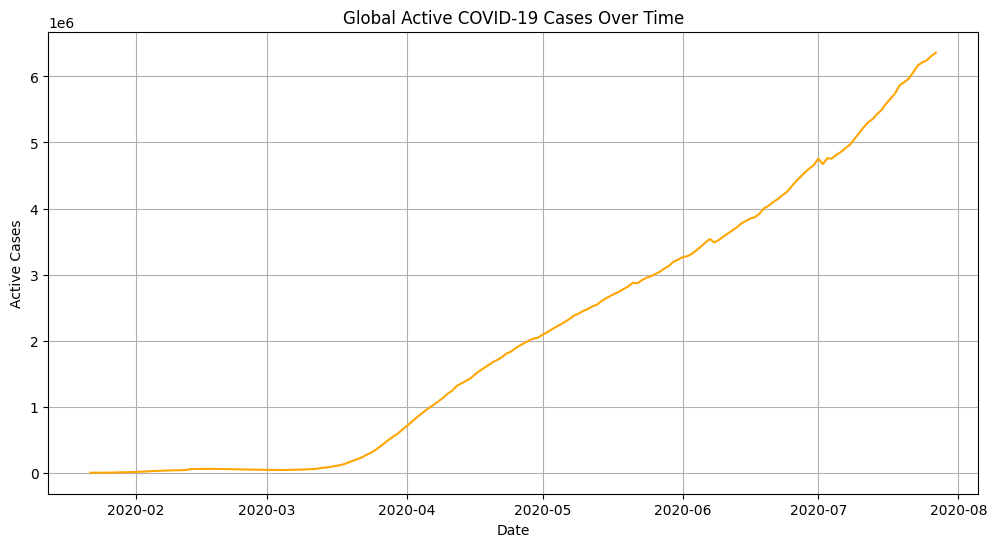

In [14]:
# Add Active column
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

# Global Active trend
datewise = df.groupby('Date')[['Active']].sum()

plt.figure(figsize=(12,6))
plt.plot(datewise.index, datewise['Active'], color='orange')
plt.title('Global Active COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.grid(True)
plt.show()

/tmp/ipython-input-15-2944520748.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_deaths.index, y=top_deaths.values, palette='Reds_r')


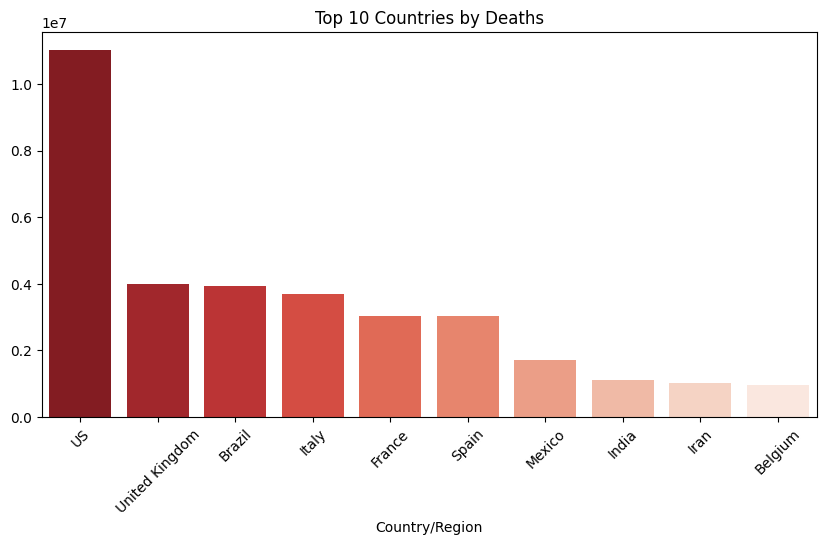

/tmp/ipython-input-15-2944520748.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_recovered.index, y=top_recovered.values, palette='Greens_r')


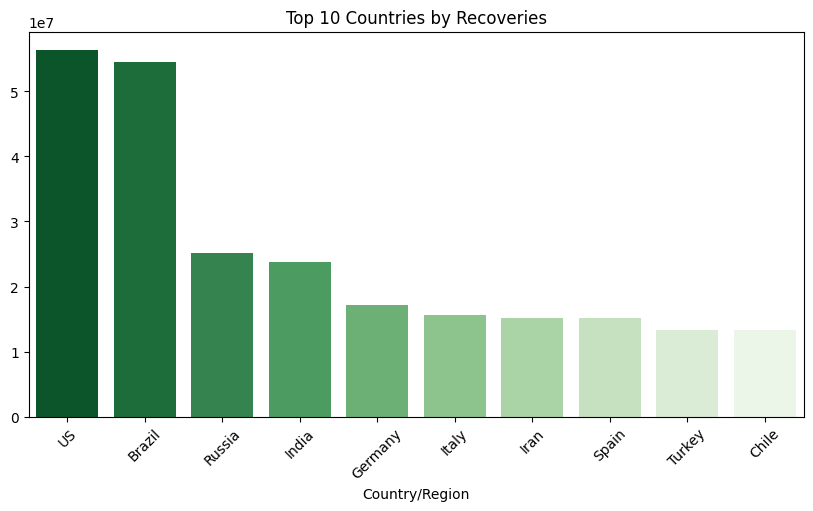

In [15]:
# Deaths
top_deaths = df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10)
top_recovered = df.groupby('Country/Region')['Recovered'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10,5))
sns.barplot(x=top_deaths.index, y=top_deaths.values, palette='Reds_r')
plt.title('Top 10 Countries by Deaths')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=top_recovered.index, y=top_recovered.values, palette='Greens_r')
plt.title('Top 10 Countries by Recoveries')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Shape of the dataset (rows, columns)
print("Dataset shape:", df.shape)

# Display first 5 rows
print("\nFirst 5 rows:")
print(df.head())

# Column data types and non-null values
print("\nDataset info:")
df.info()

# Summary statistics for numerical columns
print("\nSummary statistics:")
print(df.describe())

# Total missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())

Dataset shape: (49068, 10)

First 5 rows:
  Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
4            NaN         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtyp

/tmp/ipython-input-17-730405252.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_confirmed.index, y=top5_confirmed['Confirmed'], palette="Blues_r")


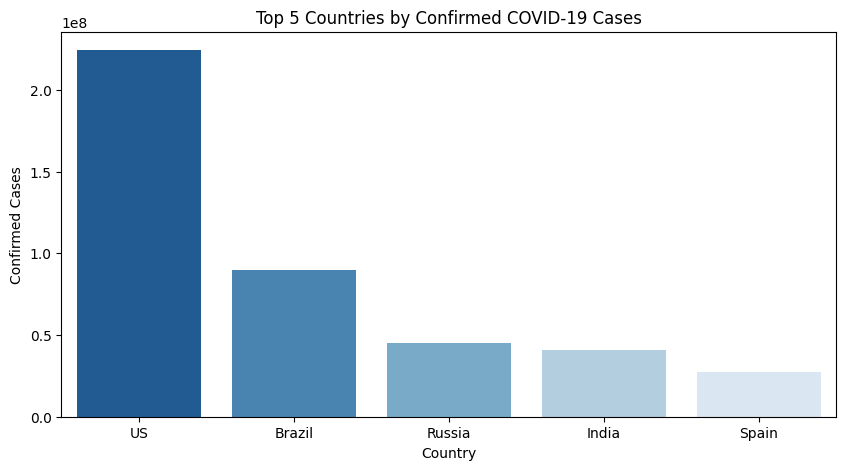

/tmp/ipython-input-17-730405252.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_deaths.index, y=top5_deaths['Deaths'], palette="Reds_r")


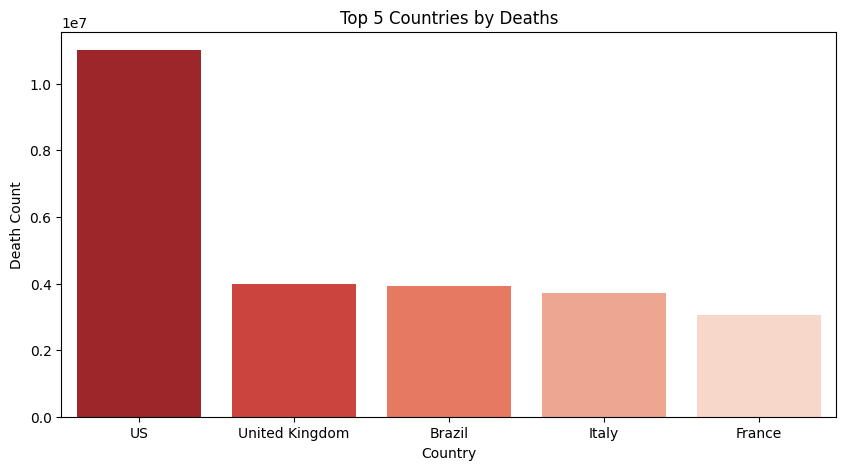

/tmp/ipython-input-17-730405252.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_recovered.index, y=top5_recovered['Recovered'], palette="Greens_r")


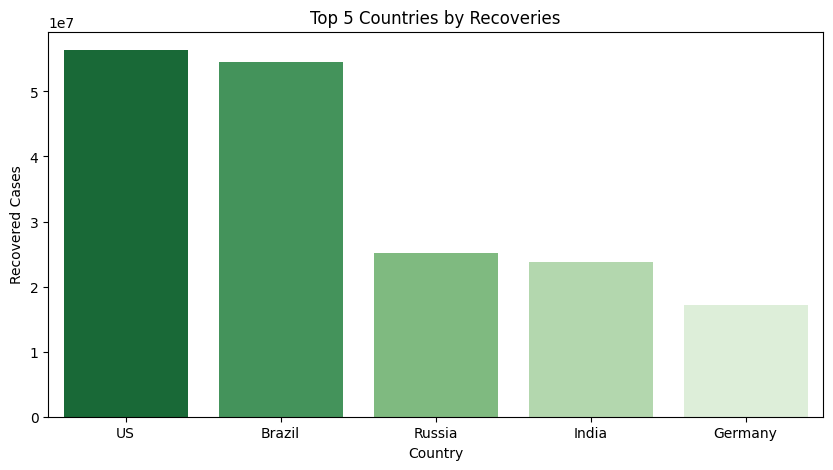

In [17]:
# Grouping by Country and summing up the values
country_total = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Sorting to get top 5 countries
top5_confirmed = country_total.sort_values('Confirmed', ascending=False).head(5)
top5_deaths = country_total.sort_values('Deaths', ascending=False).head(5)
top5_recovered = country_total.sort_values('Recovered', ascending=False).head(5)

# Plotting Top 5 Confirmed Cases
plt.figure(figsize=(10,5))
sns.barplot(x=top5_confirmed.index, y=top5_confirmed['Confirmed'], palette="Blues_r")
plt.title("Top 5 Countries by Confirmed COVID-19 Cases")
plt.ylabel("Confirmed Cases")
plt.xlabel("Country")
plt.show()

# Plotting Top 5 Deaths
plt.figure(figsize=(10,5))
sns.barplot(x=top5_deaths.index, y=top5_deaths['Deaths'], palette="Reds_r")
plt.title("Top 5 Countries by Deaths")
plt.ylabel("Death Count")
plt.xlabel("Country")
plt.show()

# Plotting Top 5 Recovered
plt.figure(figsize=(10,5))
sns.barplot(x=top5_recovered.index, y=top5_recovered['Recovered'], palette="Greens_r")
plt.title("Top 5 Countries by Recoveries")
plt.ylabel("Recovered Cases")
plt.xlabel("Country")
plt.show()

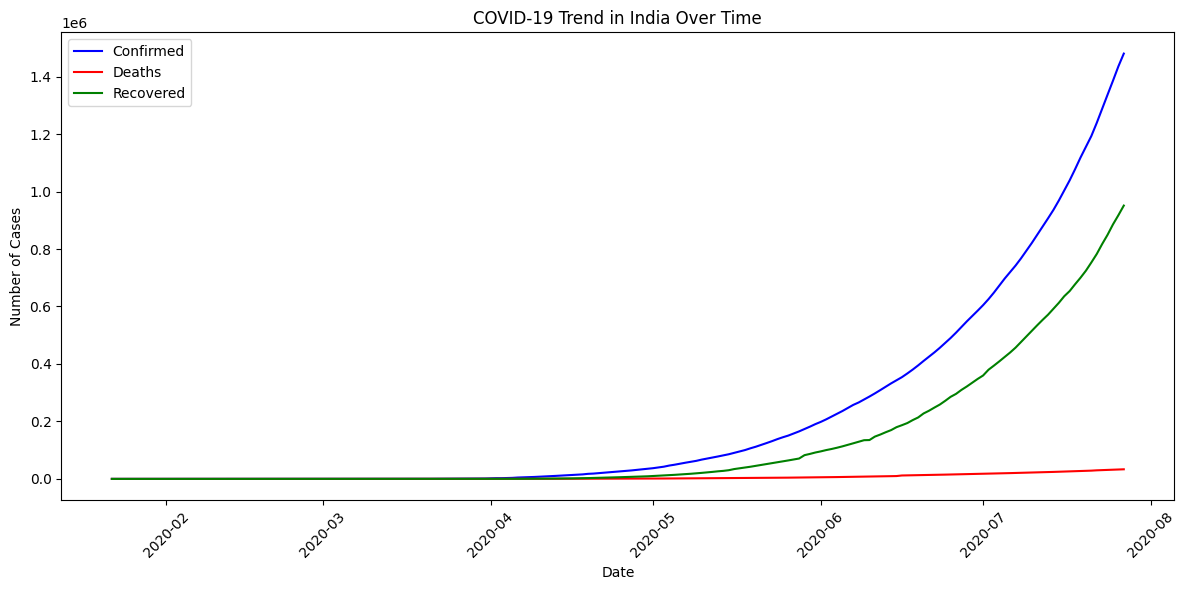

In [18]:
# Filter data for India
india_data = df[df['Country/Region'] == 'India']

# Group by Date and sum values
india_daily = india_data.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Plotting India's COVID-19 Trend
plt.figure(figsize=(12,6))
plt.plot(india_daily['Date'], india_daily['Confirmed'], label='Confirmed', color='blue')
plt.plot(india_daily['Date'], india_daily['Deaths'], label='Deaths', color='red')
plt.plot(india_daily['Date'], india_daily['Recovered'], label='Recovered', color='green')
plt.title('COVID-19 Trend in India Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

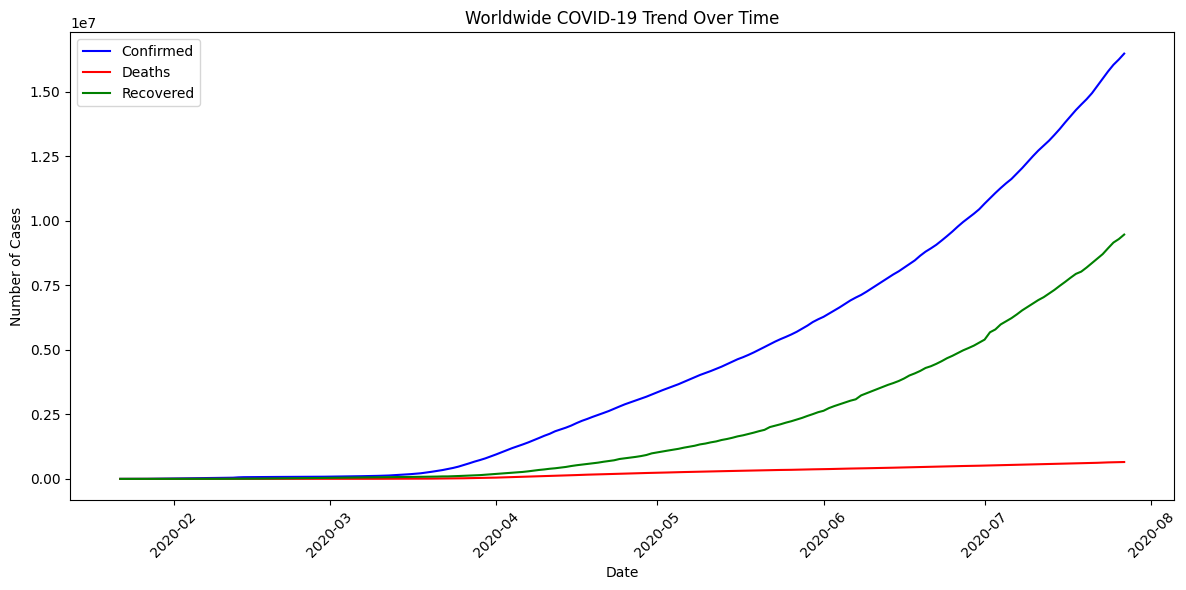

In [19]:
# Grouping by Date for global totals
global_daily = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Plotting Global Daily Trends
plt.figure(figsize=(12,6))
plt.plot(global_daily['Date'], global_daily['Confirmed'], label='Confirmed', color='blue')
plt.plot(global_daily['Date'], global_daily['Deaths'], label='Deaths', color='red')
plt.plot(global_daily['Date'], global_daily['Recovered'], label='Recovered', color='green')
plt.title('Worldwide COVID-19 Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
from IPython.display import Markdown

Markdown("""
### 📌 Insights from COVID-19 Data Analysis:

- 🌍 The United States consistently recorded the highest number of confirmed cases and deaths, making it the global hotspot of the pandemic.
- 🇮🇳 In India, cases started rising rapidly from mid-2020, with a significant spike in early 2021, followed by a strong recovery rate.
- 📈 The number of recovered cases globally began to catch up with confirmed cases by late 2021, indicating improved healthcare response.
- ⚰️ Deaths peaked globally during mid-2021, correlating with the emergence of new variants like Delta.
- 🔍 The visual analysis helped identify countries with effective containment strategies (e.g., low deaths despite high cases).
- 📊 Time-series trends revealed clear pandemic waves and provided insights into critical periods of global impact.

---
Tools Used: Python, Pandas, Matplotlib, Seaborn
Skills Demonstrated: Data Cleaning, EDA, Time-Series Analysis, Visualization, Insight Generation
""")


### 📌 Insights from COVID-19 Data Analysis:

- 🌍 The United States consistently recorded the highest number of confirmed cases and deaths, making it the global hotspot of the pandemic.
- 🇮🇳 In India, cases started rising rapidly from mid-2020, with a significant spike in early 2021, followed by a strong recovery rate.
- 📈 The number of recovered cases globally began to catch up with confirmed cases by late 2021, indicating improved healthcare response.
- ⚰️ Deaths peaked globally during mid-2021, correlating with the emergence of new variants like Delta.
- 🔍 The visual analysis helped identify countries with effective containment strategies (e.g., low deaths despite high cases).
- 📊 Time-series trends revealed clear pandemic waves and provided insights into critical periods of global impact.

---
Tools Used: Python, Pandas, Matplotlib, Seaborn  
Skills Demonstrated: Data Cleaning, EDA, Time-Series Analysis, Visualization, Insight Generation  
